In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import LogTransformer

In [2]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

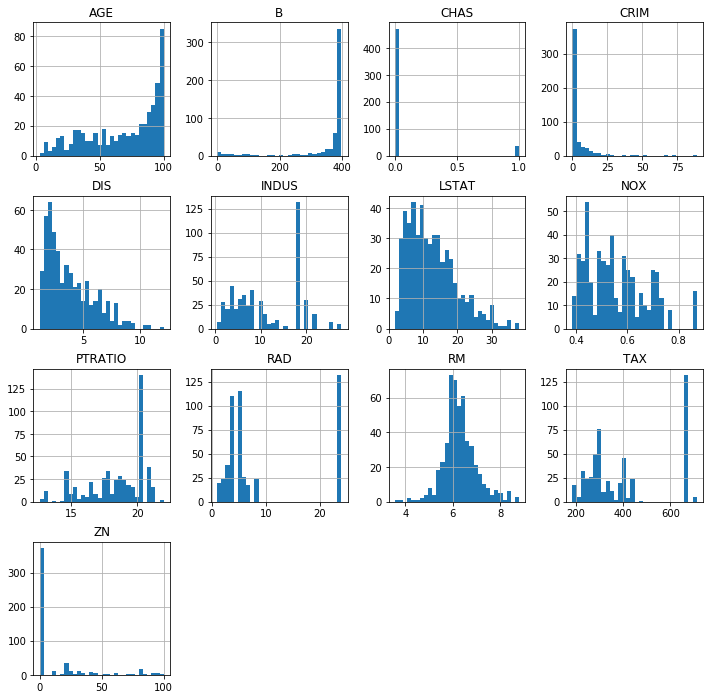

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

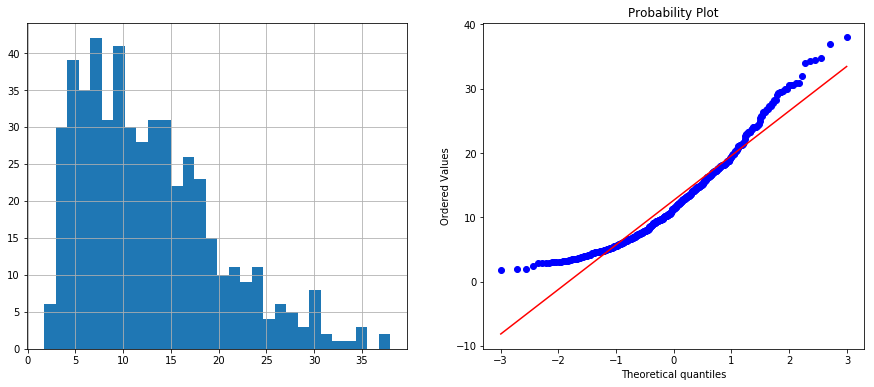

In [5]:
# check original distribution

diagnostic_plots(data, 'LSTAT')

## Logarithmic transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply log to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(
    data[['LSTAT', 'NOX', 'DIS', 'RM']])

In [8]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'LSTAT')

## Logarithmic transformation with Scikit-learn

In [9]:
# start the transformer with NumPy log as argument
transformer = FunctionTransformer(np.log, validate=True)

In [10]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

In [11]:
# capture returned NumPy array in pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

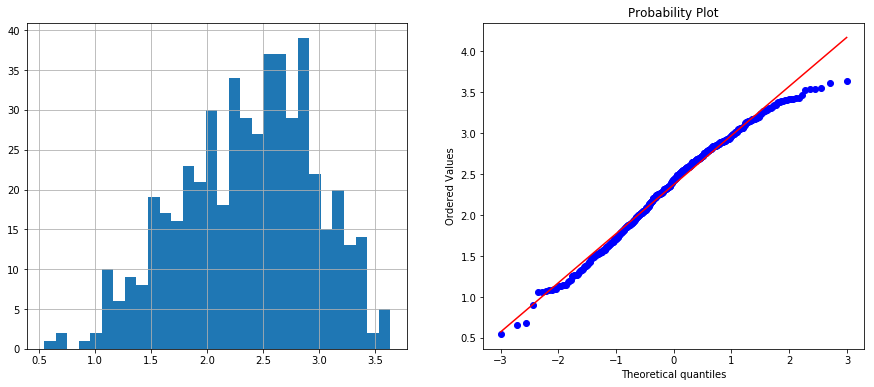

In [12]:
# use diagnostic plot function to evaluate transformation
# (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Logarithmic transformation with Feature-engine

In [13]:
# initialize the transformer
lt = LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to data set
lt.fit(data)

LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [14]:
# transform variables within our data set
data_tf = lt.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


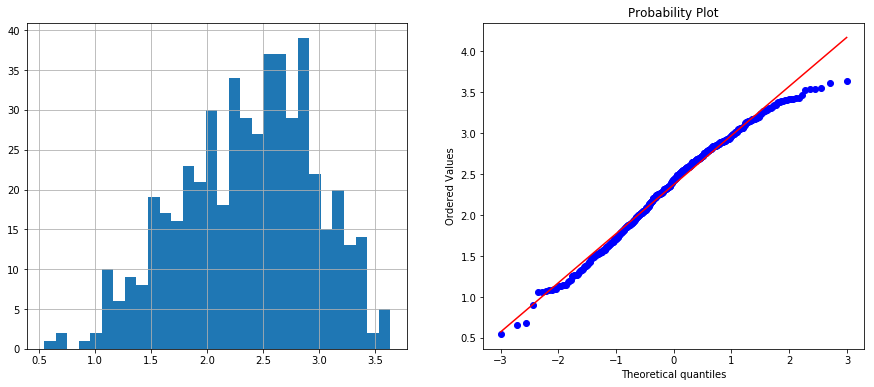

In [15]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'LSTAT')

## Logarithm with Scikit-learn selecting a group of variables

### Not in book

In [16]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
# load data set
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

In [18]:
# list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# set transformer within a pipeline
log_transformer = Pipeline(steps=[('log_transformer',
                                   FunctionTransformer(np.log, validate=True))])

# set pipeline within ColumnTransformer to select features
preprocessor = ColumnTransformer(transformers=[
    ('log_transformer', log_transformer, cols)], remainder='passthrough')

In [19]:
# fit to the data (the entire dataframe this time)
preprocessor.fit(data)

# transform the data
data_tf = preprocessor.transform(data)

In [20]:
# visualize the data as a pandas dataframe
pd.DataFrame(data_tf)

0         1         2         3        4     5      6    7     8  \
0    1.605430 -0.619897  1.408545  1.883275  0.00632  18.0   2.31  0.0  65.2   
1    2.212660 -0.757153  1.602836  1.859574  0.02731   0.0   7.07  0.0  78.9   
2    1.393766 -0.757153  1.602836  1.971996  0.02729   0.0   7.07  0.0  61.1   
3    1.078410 -0.780886  1.802073  1.945624  0.03237   0.0   2.18  0.0  45.8   
4    1.673351 -0.780886  1.802073  1.966693  0.06905   0.0   2.18  0.0  54.2   
..        ...       ...       ...       ...      ...   ...    ...  ...   ...   
501  2.269028 -0.556870  0.907694  1.886008  0.06263   0.0  11.93  0.0  69.1   
502  2.206074 -0.556870  0.827460  1.811562  0.04527   0.0  11.93  0.0  76.7   
503  1.729884 -0.556870  0.773574  1.942476  0.06076   0.0  11.93  0.0  91.0   
504  1.868721 -0.556870  0.870833  1.916040  0.10959   0.0  11.93  0.0  89.3   
505  2.064328 -0.556870  0.918289  1.796747  0.04741   0.0  11.93  0.0  80.8   

       9     10    11      12  
0    1.0  296.0  15.3  396.90  
1    2.0  242.0  17.8  396.90  
2    2.0  242.0  17.8  392.83  
3    3.0  222.0  18.7  394.63  
4    3.0  222.0  18.7  396.90  
..   ...    ...   ...     ...  
501  1.0  273.0  21.0  391.99  
502  1.0  273.0  21.0  396.90  
503  1.0  273.0  21.0  396.90  
504  1.0  273.0  21.0  393.45  
505  1.0  273.0  21.0  396.90  

[506 rows x 13 columns]